In [9]:
import numpy as np
from Analysis_classes import *
from Analysis_functions import *

import matplotlib.pyplot as plt

In [2]:
def MET_rej(event, ET_min=-1, ET_max=-1):
    """
    Return True if the event has to be rejected.
    """
    particles = get_particles(event.final_states, 12)
    
    mom_tot = 0
    for particle in particles:
        mom_tot += particle.mom
        
    ET = np.linalg.norm(mom_tot[1:3])
    return (ET < ET_min) or (ET > ET_max and ET_max != -1)

def jet_pt_rej(event, PT_min_1, PT_min_2=0):
    """
    Return True if the event has to be rejected.
    """
    jets = get_particles(event.final_states, 21)
    
    highest_pt_jets = sorted(jets, key=lambda x: x.pT, reverse=True)[:2]
    
    return (highest_pt_jets[0].pT < PT_min_1) and all([jet.pT < PT_min_2 for jet in highest_pt_jets])

def generate_DV(event, ctau, pdgs):
    """
    Generate displaced vertices for every particle in the event with pdg code
    contained in pdgs.
    Return: list of 3-vectors representing the displaced vertices.
    """
    mediators = []
    DV = []

    for pdg in pdgs:
        mediators += get_particles(event.particles, pdg)

    for y in mediators:

        k = ctau * y.beta * y.gamma

        L = np.random.exponential(k)

        DV.append(L * versor(y.mom3))

    return DV

def DV_rej(DVs, Dxy_min, Dxy_max, Dz_max):
    """
    Return True if the event has to be rejected.
    """
    rejection = []
    for DV in DVs:
        Dxy = np.linalg.norm(DV[:2])
        Dz = np.abs(DV[2])
        rejection.append((Dxy < Dxy_min) or (Dxy > Dxy_max) or (Dz > Dz_max))
    
    return all(rejection)

In [13]:
process = Process("./data/width_10e-13.lhe")

selected_events = []

ET_cut = 200
PT_min_1 = 70
PT_min_2 = 25
Dxy_min = 0.004
Dxy_max = 0.3
Dz_max = 0.3

for event in process.events:
    reject = False
    
    DV = generate_DV(event, 1e2, [4000002, -4000002])

    reject = MET_rej(event, ET_cut) or jet_pt_rej(event, PT_min_1, PT_min_2) or DV_rej(DV, Dxy_min, Dxy_max, Dz_max)
    
    if not reject:
        selected_events.append(event)

In [14]:
process.num_events

10000

In [15]:
len(selected_events)

89

In [16]:
process.cross_section

0.005814800299999008

In [17]:
A = len(selected_events)/process.num_events
Luminosity = 32.8

N_signal = process.cross_section * 1000 * Luminosity * A

print(N_signal)

1.69745650357571


In [23]:
process = Process("./data/width_10e-7.lhe")

selected_events = []

ET_cut = 200
PT_min_1 = 70
PT_min_2 = 25
Dxy_min = 0.004
Dxy_max = 0.3
Dz_max = 0.3

for event in process.events:
    reject = False
    
    DV = generate_DV(event, 1e2, [4000002, -4000002])

    reject = MET_rej(event, ET_cut) or jet_pt_rej(event, PT_min_1, PT_min_2) or DV_rej(DV, Dxy_min, Dxy_max, Dz_max)
    
    if not reject:
        selected_events.append(event)

In [24]:
process.num_events

10000

In [25]:
process.cross_section

0.005805699799999135

In [26]:
len(selected_events)

81

In [27]:
A = len(selected_events)/process.num_events
Luminosity = 32.8

N_signal = process.cross_section * 1000 * Luminosity * A

print(N_signal)

1.54245832286377


# ee > mu mu Validation

In [2]:
process = Process("./data/ee_mumu.lhe")

In [17]:
def highest_pt_jets(event, n=1):
    """
    This function returns n jets with the highest pT.
    Returns: a list of Particle class. If n=1, the single
    object will be returned.
    """
    jets = get_particles(event.final_states, 21)
    
    if n==1:
        return sorted(jets, key=lambda x: x.pT, reverse=True)[0]
    else:
        return sorted(jets, key=lambda x: x.pT, reverse=True)[:n]

In [4]:
jets = [highest_pt_jet(event) for event in process.events]

In [7]:
pTs = [jet.pT for jet in jets]

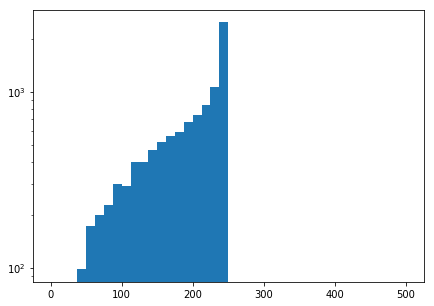

In [16]:
plt.figure(figsize=(7,5))
plt.hist(pTs, range=(0, 500), bins=40)
plt.yscale('log')
plt.show()

In [11]:
?plt.hist